In [ ]:
! ls "/content/drive/MyDrive/CloudPhysician_Data/Classification Dataset"

BPL-EliteView-EV100-C			    BPL-Ultima-PrimeD-A.csv
BPL-EliteView-EV100-C.csv		    Nihon-Kohden-lifescope-A
BPL-EliteView-EV10-B_Meditec-England-A	    Nihon-Kohden-lifescope-A.csv
BPL-EliteView-EV10-B_Meditec-England-A.csv  readme.txt
BPL-Ultima-PrimeD-A


In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os

os.chdir('/content/drive/MyDrive/CloudPhysician_Data/Classification Dataset')

In [ ]:
lifescopeA = pd.read_csv('BPL-Ultima-PrimeD-A.csv')

In [ ]:
lifescopeA.iloc[0]

image_name           prashant_icu_mon--1_2022_12_7_22_15_2.jpeg
HR            [0.804296875, 0.16319444444444445, 0.25390625,...
SBP           [0.146875, 0.9076388888888889, 0.1375, 0.10138...
DBP           [0.304296875, 0.9125, 0.09609375, 0.1055555555...
MAP           [0.5390625, 0.8972222222222223, 0.065625, 0.07...
SPO2                                                        NaN
RR            [0.854296875, 0.8708333333333333, 0.18828125, ...
HR_W          [0.302734375, 0.27152777777777776, 0.60078125,...
RR_W          [0.326953125, 0.6506944444444445, 0.61484375, ...
SPO2_W                                                      NaN
Name: 0, dtype: object

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.5 MB/s eta 0:00:00


In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.43G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!nvidia-smi

Tue Jan 24 14:12:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [ ]:
model = model.to(DEVICE)

<generator object Module.parameters at 0x7fc53b9f9970>

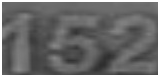

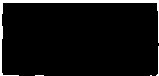

In [ ]:
index = 17
img_name = lifescopeA.iloc[index]['image_name']

x, y, w, h = eval(lifescopeA.iloc[index]['SBP'])

img = cv2.imread(f'./BPL-Ultima-PrimeD-A/{img_name}', 0)

x *= img.shape[1]
w *= img.shape[1]
y *= img.shape[0]
h *= img.shape[0]

cv2.rectangle(img, (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), (255, 0, 0), 2)
#cv2_imshow(img)
hr_img = img[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)]

#hr_img = cv2.fastNlMeansDenoisingColored(hr_img,None,10,10,7,21)

#ret, hr_img = cv2.threshold(hr_img, 140, 255, cv2.THRESH_BINARY)
#hr_img2 = cv2.adaptiveThreshold(hr_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

blur = cv2.GaussianBlur(hr_img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2_imshow(hr_img)
cv2_imshow(th3)

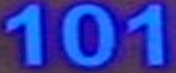

<ipython-input-29-b37f5629b8fa>:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pixel_values = torch.tensor(pixel_values).to(DEVICE)
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 101 index: 0
(73, 176, 3)
incorrect fields at index: 1


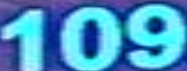

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 109 index: 2
(71, 187, 3)
incorrect fields at index: 3
incorrect fields at index: 4


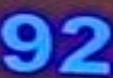

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 92 index: 5
(78, 113, 3)
incorrect fields at index: 6


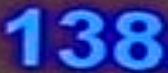

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 138 index: 7
(73, 168, 3)
incorrect fields at index: 8
incorrect fields at index: 9
incorrect fields at index: 10
incorrect fields at index: 11
incorrect fields at index: 12


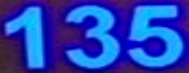

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 135 index: 13
(73, 189, 3)


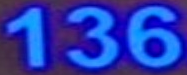

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 136 index: 14
(75, 187, 3)


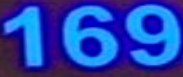

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 169 index: 15
(77, 183, 3)
incorrect fields at index: 16


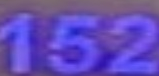

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 152 index: 17
(76, 159, 3)
incorrect fields at index: 18
incorrect fields at index: 19
incorrect fields at index: 20


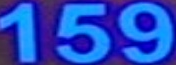

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 159 index: 21
(65, 176, 3)
incorrect fields at index: 22


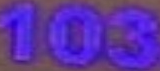

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 103 index: 23
(71, 160, 3)
incorrect fields at index: 24


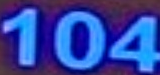

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 104 index: 25
(75, 160, 3)


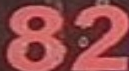

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 82 index: 26
(71, 129, 3)
incorrect fields at index: 27


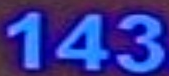

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 143 index: 28
(76, 169, 3)


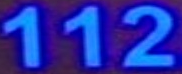

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 112 index: 29
(74, 182, 3)
incorrect fields at index: 30


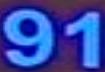

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 91 index: 31
(72, 105, 3)


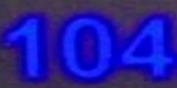

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 104 index: 32
(88, 177, 3)


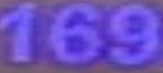

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 169 index: 33
(73, 163, 3)


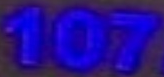

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 107 index: 34
(77, 164, 3)


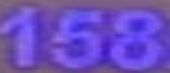

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 158 index: 35
(73, 170, 3)


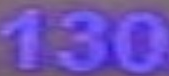

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 130 index: 36
(76, 169, 3)
incorrect fields at index: 37
incorrect fields at index: 38


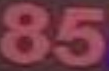

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 85 index: 39
(71, 109, 3)


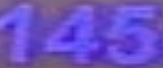

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 145 index: 40
(68, 163, 3)


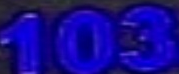

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 103 index: 41
(74, 179, 3)


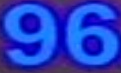

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 96 index: 42
(73, 121, 3)


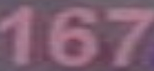

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 167 index: 43
(71, 154, 3)


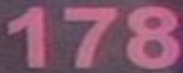

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 178 index: 44
(73, 183, 3)
incorrect fields at index: 45


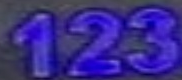

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 123 index: 46
(80, 182, 3)
incorrect fields at index: 47
incorrect fields at index: 48


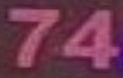

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 74 index: 49
(78, 123, 3)
incorrect fields at index: 50


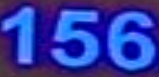

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 156 index: 51
(77, 159, 3)
incorrect fields at index: 52
incorrect fields at index: 53
incorrect fields at index: 54


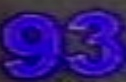

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 93 index: 55
(82, 126, 3)
incorrect fields at index: 56


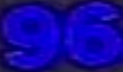

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 96 index: 57
(72, 123, 3)
incorrect fields at index: 58


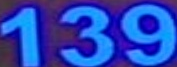

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 139 index: 59
(67, 177, 3)


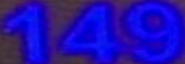

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 149 index: 60
(64, 185, 3)


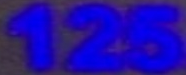

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 125 index: 61
(75, 186, 3)


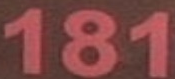

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 181 index: 62
(79, 175, 3)
incorrect fields at index: 63
incorrect fields at index: 64


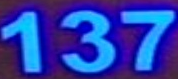

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 137 index: 65
(79, 178, 3)
incorrect fields at index: 66
incorrect fields at index: 67
incorrect fields at index: 68


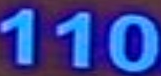

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 110 index: 69
(76, 161, 3)


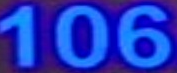

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 106 index: 70
(73, 177, 3)


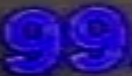

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 99 index: 71
(76, 132, 3)
incorrect fields at index: 72


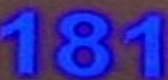

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 181 index: 73
(80, 168, 3)


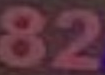

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 82 index: 74
(75, 105, 3)
incorrect fields at index: 75


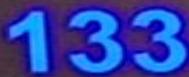

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 133 index: 76
(77, 189, 3)
incorrect fields at index: 77


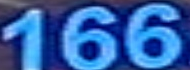

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 166 index: 78
(70, 190, 3)


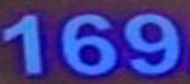

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 169 index: 79
(84, 190, 3)
incorrect fields at index: 80
incorrect fields at index: 81
incorrect fields at index: 82


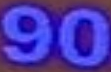

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 90 index: 83
(72, 111, 3)


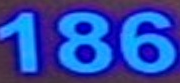

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 186 index: 84
(83, 180, 3)
incorrect fields at index: 85


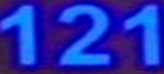

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 121 index: 86
(74, 164, 3)


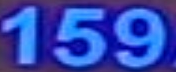

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 159 index: 87
(72, 176, 3)
incorrect fields at index: 88
incorrect fields at index: 89


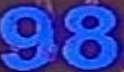

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 98 index: 90
(72, 124, 3)


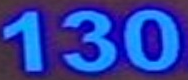

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 130 index: 91
(80, 188, 3)


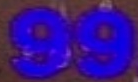

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 99 index: 92
(82, 138, 3)


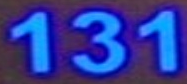

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 131 index: 93
(84, 187, 3)
incorrect fields at index: 94


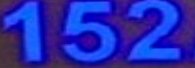

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 152 index: 95
(68, 195, 3)


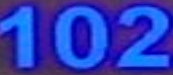

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 102 index: 96
(75, 173, 3)


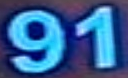

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 91 index: 97
(78, 128, 3)


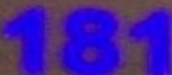

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 181 index: 98
(75, 172, 3)


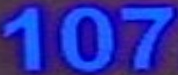

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


text2: 107 index: 99
(75, 178, 3)


In [ ]:
import tensorflow as tf
# import keras_ocr
# recognizer = keras_ocr.recognition.Recognizer()
# recognizer.compile()

for index in range(100):
  img_name = lifescopeA.iloc[index]['image_name']
  
  try:
    x, y, w, h = eval(lifescopeA.iloc[index]['SBP'])
  except:
    print(f'incorrect fields at index: {index}')
    continue

  img = cv2.imread(f'./BPL-Ultima-PrimeD-A/{img_name}')
  x *= img.shape[1]
  w *= img.shape[1]
  y *= img.shape[0]
  h *= img.shape[0]

  #cv2.rectangle(img, (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), (255, 0, 0), 2)
  hr_img = img[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)]
  #hr_img = cv2.resize(hr_img, (hr_img.shape[0] * (90, 90//hr_img.shape[1]+1)))
  #ret, hr_img = cv2.threshold(hr_img, 200, 255, cv2.THRESH_BINARY)
  #hr_img = cv2.adaptiveThreshold(hr_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
  # hr_img = cv2.fastNlMeansDenoisingColored(hr_img,None,10,10,7,21)
  # ret,hr_img = cv2.threshold(hr_img, 230, 255, cv2.THRESH_BINARY)
  
  # kernel = np.array([[0, -1, 0],
  #                   [-1, 4.9,-1],
  #                   [0, -1, 0]])
  # hr_img = cv2.filter2D(src=hr_img, ddepth=-1, kernel=kernel)
  cv2_imshow(hr_img)
  
  pixel_values = processor(hr_img, return_tensors="pt").pixel_values
  pixel_values = torch.tensor(pixel_values).to(DEVICE)
  
  generated_ids = model.generate(pixel_values)
  generated_text2 = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  # generated_text = recognizer.recognize(hr_img)
  # #generated_text = pytesseract.image_to_string(hr_img)
  # print(f'text: {generated_text} index: {index}')
  print(f'text2: {generated_text2} index: {index}')
  print(hr_img.shape)

Looking for /root/.keras-ocr/crnn_kurapan.h5


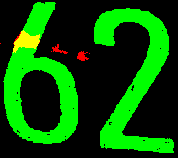

1/1 [==============================] - 2s 2s/step
62


In [ ]:
!pip install keras_ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 KB 145.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 7.2 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=13765c49d163caa53def8b665c2b43e50030192912f421159b71b19742166e4f
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [ ]:
pixel_values = processor(hr_img, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(f'text: {generated_text}')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


text: 67


In [ ]:
! pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 23 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,268 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)